## WGU D208: Predictive Modeling
### Task 2: Logistc Regression

#### Data Acquisition

In [1]:
# Import the standard libraries.

import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.core.display import HTML
from IPython.display import display

In [2]:
# Import and configure Matplotlib.

import matplotlib.pyplot as plt
plt.rc("font", size=14)

In [3]:
# Import and configure Sklearn.

from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn import metrics

In [4]:
# Import and configure Seaborn.

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [5]:
# Import and configure Pandas.

import pandas as pd
pd.set_option('display.precision',3)
pd.set_option('display.max_columns',9)
pd.set_option('display.width', None)

##### Disabling the scrollbars in Jupyter Notebook and automatic scroll to the bottom. 

In [6]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [7]:
%%javascript
require("notebook/js/notebook").Notebook.prototype.scroll_to_bottom = function () {}

<IPython.core.display.Javascript object>

In [8]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [9]:
# Load the CSV file
df = pd.read_csv('/churn_clean.csv')
df.head()

,CaseOrder,Customer_id,Interaction,UID,...,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,...,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,...,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,...,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,...,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,...,4,4,4,5


In [10]:
# List of the variables in the data frame.
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

In [11]:
# Show the shape of the data frame.
df.shape

(10000, 50)

#### Data Cleaning

In [12]:
# Rename the last 8 columns from the customer survey.

df.rename(columns = {'Item1': 'TimelyResponse', 
          'Item2': 'TimelyFixes', 
          'Item3': 'TimelyReplacements', 
          'Item4': 'Reliability', 
          'Item5': 'Options', 
          'Item6': 'RespectfulResponse',
          'Item7': 'CourteousExchange',
          'Item8': 'ActiveListening'}, 
          inplace = True)
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'TimelyResponse', 'TimelyFixes',
       'TimelyReplacements', 'Reliability', 'Options', 'RespectfulResponse',
       'CourteousExchange', 'ActiveListening'],
      dtype='object')

In [13]:
# Check for missing values.
df.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [14]:
# Search for duplicated columns.
df.columns.duplicated().any()

False

In [15]:
# Search for duplicated rows.
df.duplicated().any()

False

In [16]:
# Remove data with a high degree of cardinality and rename the data frame to preserve data.

df2 = df.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'TimeZone', 'Job', 'TimelyResponse', 'TimelyFixes',
       'TimelyReplacements', 'Reliability', 'Options', 'RespectfulResponse',
       'CourteousExchange', 'ActiveListening' ], axis = 1)
df2.head()

,Population,Area,Children,Age,...,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,38,Urban,0,68,...,Credit Card (automatic),6.796,172.456,904.536
1,10446,Urban,1,27,...,Bank Transfer(automatic),1.157,242.633,800.983
2,3735,Urban,4,50,...,Credit Card (automatic),15.754,159.948,2054.707
3,13863,Suburban,1,48,...,Mailed Check,17.087,119.957,2164.579
4,11352,Suburban,0,83,...,Mailed Check,1.671,149.948,271.493


In [17]:
# Detect outliers with the z-score of each numerical variable.

# Gather only the numerical data.
df_numerical = df2.select_dtypes(exclude = 'object')

# Calculate the z-scores.
z_scores = stats.zscore(df_numerical)

# Get the absolute values.
abs_z_scores = np.abs(z_scores)

# Select the data points with a z-score above or below 3. 
filtered_scores = (abs_z_scores < 3).all(axis = 1)

# Filter the data set.
df_wo_outliers = df2[filtered_scores]
df_wo_outliers.shape

(9175, 30)

In [18]:
# Rename the clean data frame.

clean = df_wo_outliers.copy()
clean.columns

Index(['Population', 'Area', 'Children', 'Age', 'Income', 'Marital', 'Gender',
       'Churn', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet',
       'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year'],
      dtype='object')

#### Data Exploration

In [19]:
# Variable Statistics of the numerical variables.
clean.describe()

,Population,Children,Age,Income,...,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,9175.000,9175.000,9175.000,9175.000,...,9175.000,9175.000,9175.000,9175.000
mean,8527.719,1.945,53.078,38298.941,...,0.374,34.440,172.730,3380.574
std,11802.987,1.897,20.653,25056.127,...,0.582,26.451,42.994,2186.226
min,0.000,0.000,18.000,348.670,...,0.000,1.005,79.979,155.507
25%,720.500,0.000,35.000,19102.015,...,0.000,7.894,139.979,1225.876
50%,2723.000,1.000,53.000,32783.940,...,0.000,30.178,169.938,3158.141
75%,11866.000,3.000,71.000,52139.615,...,1.000,61.415,202.443,5581.681
max,52967.000,8.000,89.000,124025.100,...,2.000,71.999,290.160,7158.982


In [20]:
# Show the variables to be analyzed.

for c in clean.loc[:, clean.columns]:
    if clean.dtypes[c] == "object":
        print('\n{} is categorical: {}.'.format(c,clean[c].unique()))
    else:
        print('\n{} is numerical:'.format(c ))
        print('\trange = {} - {}'.format(clean[c].min(),clean[c].max()))
        print('\tmean = {:.2f} +/- {:.2f}'.format(clean[c].mean(), clean[c].std()))


Population is numerical:
	range = 0 - 52967
	mean = 8527.72 +/- 11802.99

Area is categorical: ['Urban' 'Suburban' 'Rural'].

Children is numerical:
	range = 0 - 8
	mean = 1.95 +/- 1.90

Age is numerical:
	range = 18 - 89
	mean = 53.08 +/- 20.65

Income is numerical:
	range = 348.67 - 124025.1
	mean = 38298.94 +/- 25056.13

Marital is categorical: ['Widowed' 'Married' 'Separated' 'Never Married' 'Divorced'].

Gender is categorical: ['Male' 'Female' 'Nonbinary'].

Churn is categorical: ['No' 'Yes'].

Outage_sec_perweek is numerical:
	range = 1.144796 - 18.85173
	mean = 10.01 +/- 2.93

Email is numerical:
	range = 3 - 21
	mean = 12.02 +/- 3.01

Contacts is numerical:
	range = 0 - 3
	mean = 0.94 +/- 0.90

Yearly_equip_failure is numerical:
	range = 0 - 2
	mean = 0.37 +/- 0.58

Techie is categorical: ['No' 'Yes'].

Contract is categorical: ['One year' 'Month-to-month' 'Two Year'].

Port_modem is categorical: ['Yes' 'No'].

Tablet is categorical: ['Yes' 'No'].

InternetService is categoric

##### Target Variable

In [21]:
# Explore the target variable.

target = 'Churn'

for idx, c in enumerate(clean.loc[:, clean.columns == target]):
    if clean.dtypes[c] == "object":
        print('\n{}. {} is categorical: {}.'.format(idx+1,c,clean[c].unique()))
        for idx,name in enumerate(clean[c].value_counts().index.tolist()):
            print('\t{:<8}:{:>6}'.format(name,clean[c].value_counts()[idx]))
    else:
        print('\n{}. {} is numerical.'.format(idx+1, c))


1. Churn is categorical: ['No' 'Yes'].
	No      :  6739
	Yes     :  2436


No     6739
Yes    2436
Name: Churn, dtype: int64


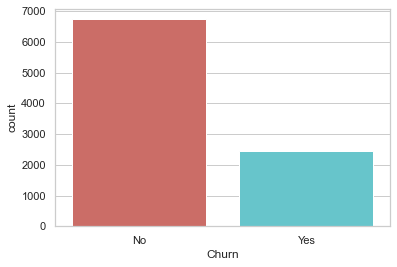

In [22]:
# Plot the target data.

print(clean[target].value_counts())
sns.countplot(x=target, data=clean, palette='hls')
plt.show()

In [23]:
# Calculate the churn ratio.

count_no_churn = len(clean[clean[target]=='No'])
count_churn = len(clean[clean[target]=='Yes'])
pct_of_no_churn = count_no_churn/(count_no_churn+count_churn)
pct_of_churn = count_churn/(count_no_churn+count_churn)
print('% of customers that did not churn: {:.1%}'.format(pct_of_no_churn ))
print('% of customers that did churn: {:.1%}'.format(pct_of_churn ))

% of customers that did not churn: 73.4%
% of customers that did churn: 26.6%


In [24]:
# Calculate the numerical mean data compared to the target.
clean.groupby(target).mean().round(2).T

Churn,No,Yes
Population,8531.24,8517.97
Children,1.94,1.95
Age,52.94,53.46
Income,38297.90,38301.83
Outage_sec_perweek,10.00,10.02
Email,11.99,12.11
Contacts,0.94,0.95
Yearly_equip_failure,0.38,0.37
Tenure,42.19,13.00
MonthlyCharge,163.13,199.28


#### Data Wrangling
##### Categorical Variables

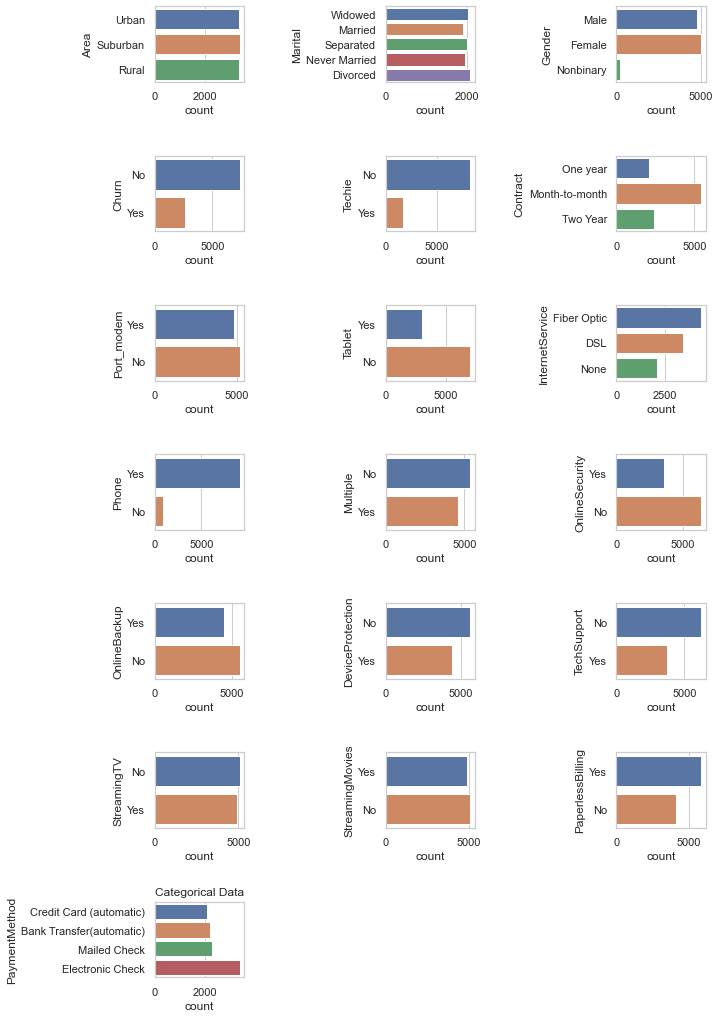

In [25]:
# Univariate Statistics: Explore the categorical data before re-expressing.

cat_cols = clean.select_dtypes(include = 'object').columns

fig = plt.figure(figsize = (10, 20))
for i, col in enumerate(cat_cols):
    plt.subplot(10, 3, i+1)
    ax = sns.countplot(y = col, data = df2)
    fig.tight_layout(h_pad = 4, w_pad = 4)
    
plt.title('Categorical Data')
plt.show()

In [26]:
# Re-categorize the Payment Method data into two categories: Automatic and Check.

clean['PaymentMethod']=np.where(clean['PaymentMethod'] =='Credit Card (automatic)', 'Automatic',clean['PaymentMethod'])
clean['PaymentMethod']=np.where(clean['PaymentMethod'] =='Bank Transfer(automatic)', 'Automatic',clean['PaymentMethod'])
clean['PaymentMethod']=np.where(clean['PaymentMethod'] =='Mailed Check', 'Check',clean['PaymentMethod'])
clean['PaymentMethod']=np.where(clean['PaymentMethod'] =='Electronic Check', 'Check',clean['PaymentMethod'])

# Verify the change.
clean['PaymentMethod'].unique()

array(['Automatic', 'Check'], dtype=object)

In [27]:
# Re-categorize the Marital data into two categories: Not_Married and Married.

clean['Marital']=np.where(clean['Marital'] =='Widowed', 'Not_Married',clean['Marital'])
clean['Marital']=np.where(clean['Marital'] =='Separated', 'Not_Married',clean['Marital'])
clean['Marital']=np.where(clean['Marital'] =='Never Married', 'Not_Married',clean['Marital'])
clean['Marital']=np.where(clean['Marital'] =='Divorced', 'Not_Married',clean['Marital'])

# Verify the change. 
clean['Marital'].unique()

array(['Not_Married', 'Married'], dtype=object)

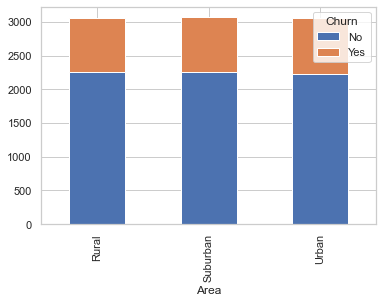

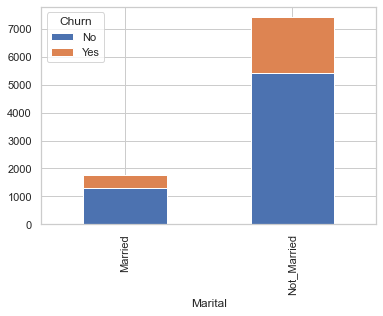

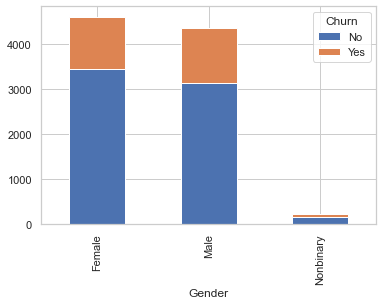

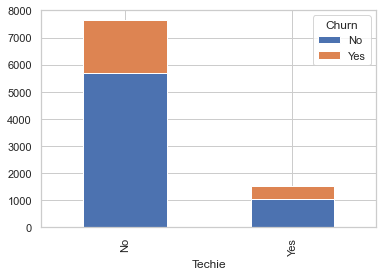

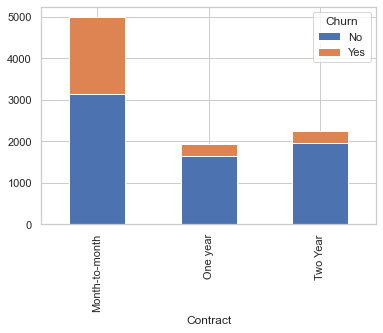

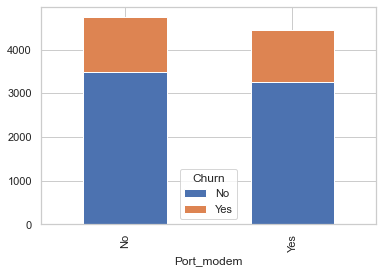

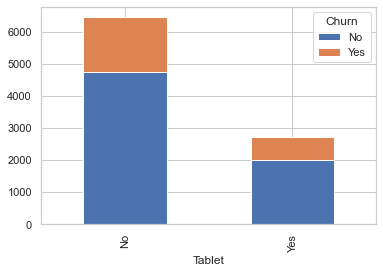

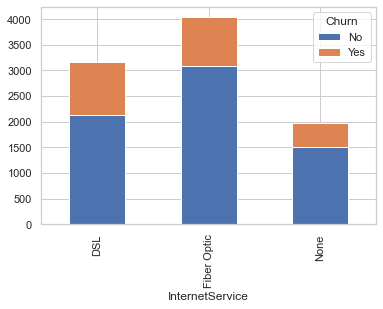

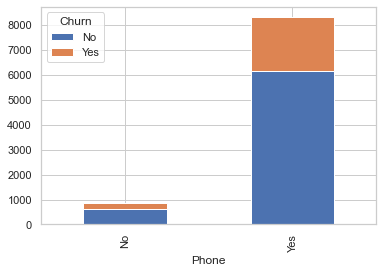

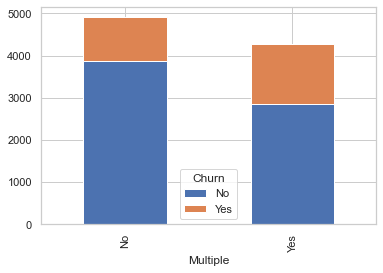

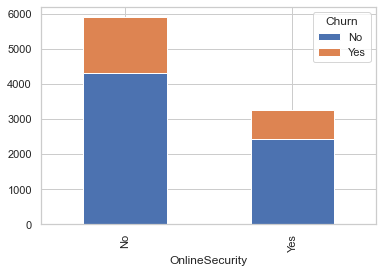

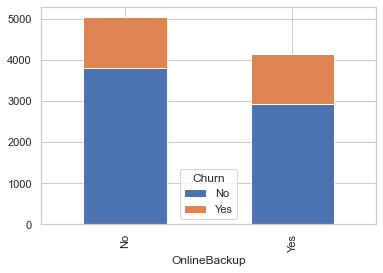

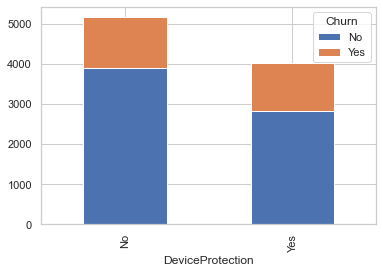

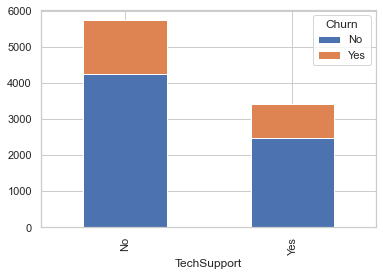

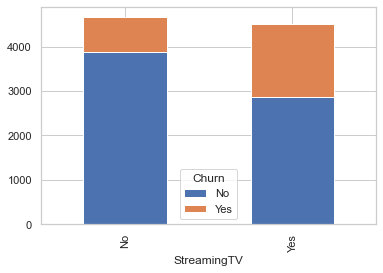

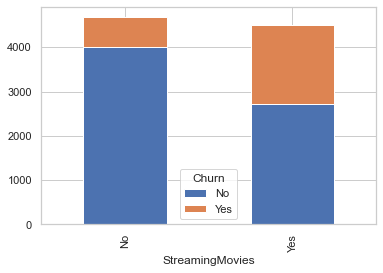

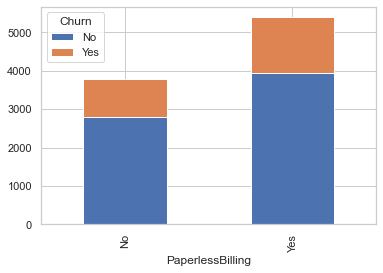

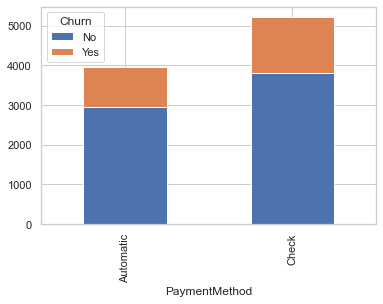

In [28]:
# Bivariate plots of each categorical variable vs the target variable of churn. 

def plot_stacked(c):
    clean.groupby([c, target]).size().unstack().plot(kind = 'bar', stacked = True)

for c in cat_cols:
    if c != target:
        plot_stacked(c)

In [29]:
# Re-express the categorical data as numeric. 

for c in cat_cols:
    if c in clean.columns:
        clean = pd.get_dummies(clean, columns=[c], drop_first=True)
pred_vars = clean.select_dtypes(include="uint8").columns.tolist()
print(pred_vars)

['Area_Suburban', 'Area_Urban', 'Marital_Not_Married', 'Gender_Male', 'Gender_Nonbinary', 'Churn_Yes', 'Techie_Yes', 'Contract_One year', 'Contract_Two Year', 'Port_modem_Yes', 'Tablet_Yes', 'InternetService_Fiber Optic', 'InternetService_None', 'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'PaperlessBilling_Yes', 'PaymentMethod_Check']


In [30]:
# Reset the target variable to use the dummy variable.
target = 'Churn_Yes'

##### Numeric Variables

In [31]:
# Explore the mean values of numeric data in the data set.

for c in pred_vars:
    if c != target:
        print('\n\n======================================')
        print('\t{}'.format(c.upper()))
        print('======================================')
        print(clean.groupby(c).mean().round(2).T)



	AREA_SUBURBAN
Area_Suburban                       0         1
Population                    8441.99   8698.20
Children                         1.96      1.92
Age                             53.08     53.07
Income                       38205.51  38484.73
Outage_sec_perweek               9.99     10.05
Email                           12.04     11.99
Contacts                         0.94      0.93
Yearly_equip_failure             0.37      0.38
Tenure                          34.60     34.13
MonthlyCharge                  172.62    172.94
Bandwidth_GB_Year             3392.62   3356.63
Area_Urban                       0.50      0.00
Marital_Not_Married              0.80      0.82
Gender_Male                      0.48      0.47
Gender_Nonbinary                 0.02      0.02
Churn_Yes                        0.27      0.26
Techie_Yes                       0.17      0.16
Contract_One year                0.21      0.21
Contract_Two Year                0.24      0.25
Port_modem_Yes         

In [32]:
# Describe the numeric data.

pred_vars = clean.select_dtypes(include="number").columns
clean[pred_vars].describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
Population,9175.0,8527.719,11802.987,0.000,720.500,2723.000,11866.000,52967.000
Children,9175.0,1.945,1.897,0.000,0.000,1.000,3.000,8.000
Age,9175.0,53.078,20.653,18.000,35.000,53.000,71.000,89.000
Income,9175.0,38298.941,25056.127,348.670,19102.015,32783.940,52139.615,124025.100
Outage_sec_perweek,9175.0,10.007,2.928,1.145,8.023,10.021,11.964,18.852
Email,9175.0,12.024,3.008,3.000,10.000,12.000,14.000,21.000
Contacts,9175.0,0.940,0.899,0.000,0.000,1.000,2.000,3.000
Yearly_equip_failure,9175.0,0.374,0.582,0.000,0.000,0.000,1.000,2.000
Tenure,9175.0,34.440,26.451,1.005,7.894,30.178,61.415,71.999
MonthlyCharge,9175.0,172.730,42.994,79.979,139.979,169.938,202.443,290.160


<Figure size 720x1440 with 0 Axes>

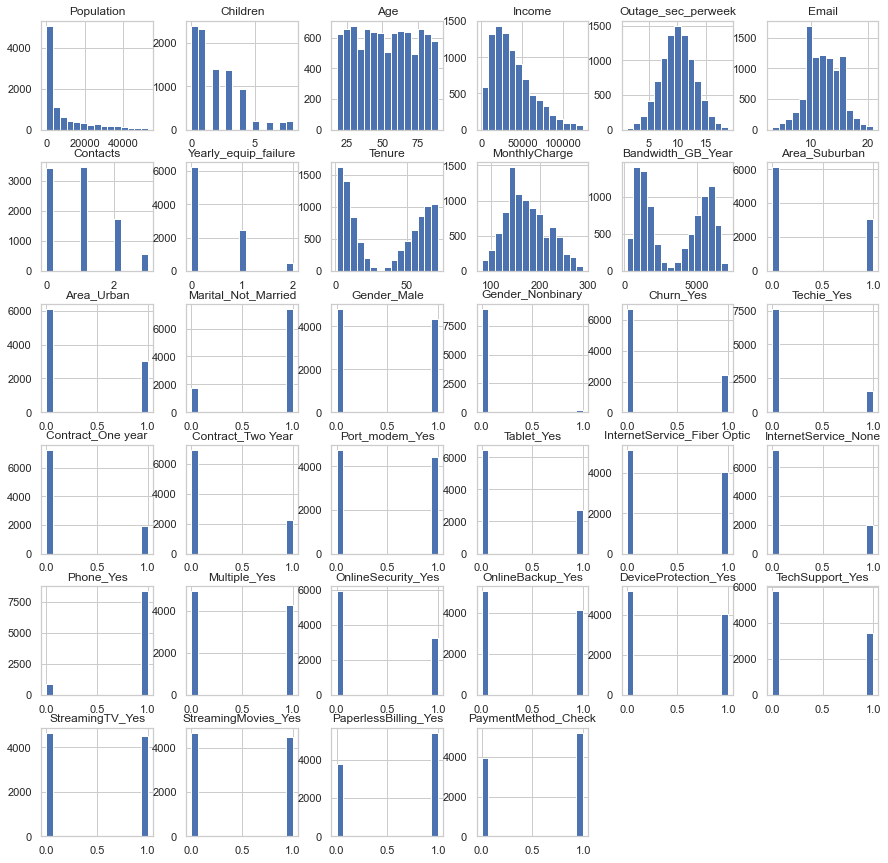

In [34]:
# Univariate histogram plots of the numeric data.

num_cols = clean.select_dtypes(include="number").columns

fig = plt.figure(figsize=(10, 20))
ax = clean[num_cols].hist(bins = 15, figsize=(15,15))
plt.title('Numeric Data')
fig.tight_layout(h_pad=5, w_pad=5)
plt.show()

In [35]:
# Bivariate histogram plots of each numeric variable compared to the target variable churn. 

def plot_histogram(c):
    df_yes = clean[clean.Churn_Yes==1][c]
    df_no = clean[clean.Churn_Yes==0][c]
    yes_mean = df_yes.mean();
    no_mean = df_no.mean(); 
    fig,ax = plt.subplots(figsize=(6,6))
    ax.hist([df_yes,df_no], bins=5, stacked=True)
    ax.legend(['Churn - Yes','Churn - No'])
    ymin, ymax = ax.get_ylim();
    xmin, xmax = ax.get_xlim()
    ax.axvline(yes_mean, color='blue', lw=2) # yes mean
    ax.axvline(no_mean, color='orangered', lw=2) # no mean
    ax.text((xmax-xmin)/2,
            (ymax-ymin)/2,
            'Delta:\n' + str(round(abs(yes_mean - no_mean),2)),
            bbox={'facecolor':'white'})
    plt.title('Histogram with target overlay by ' + str(c))
    plt.xlabel(c); 
    plt.ylabel('# Churn');
    plt.show();

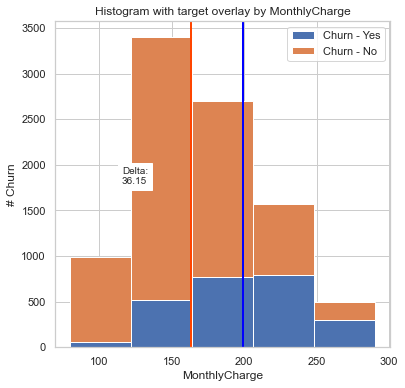

In [36]:
# Churn vs. Monthly Charge
plot_histogram('MonthlyCharge')

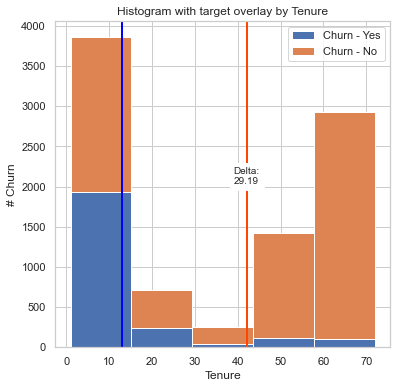

In [37]:
# Churn vs. Tenure
plot_histogram('Tenure')

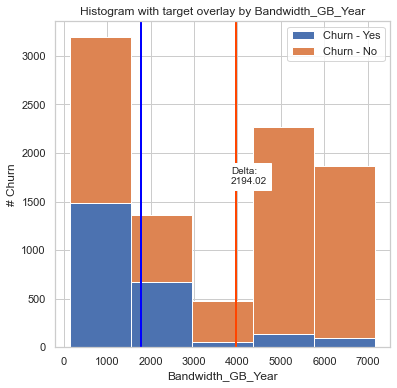

In [38]:
# Churn vs. Bandwidth_GB_Year
plot_histogram('Bandwidth_GB_Year')

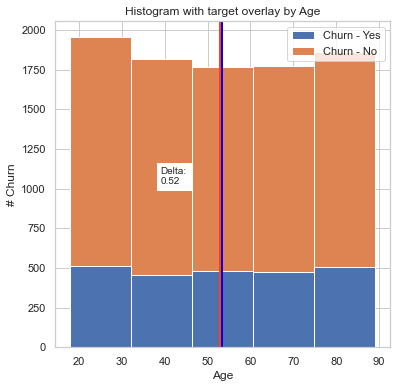

In [39]:
# Churn vs. Age
plot_histogram('Age')

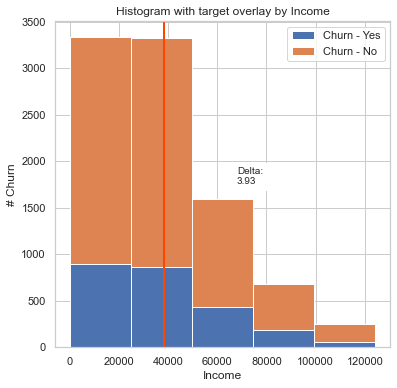

In [40]:
# Churn vs. Income
plot_histogram('Income')

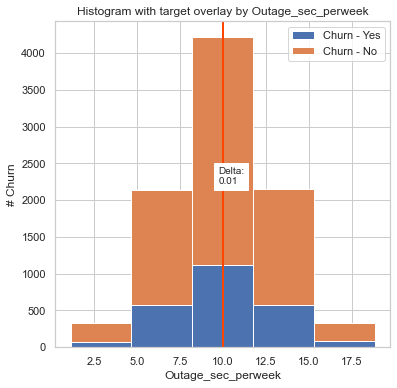

In [41]:
# Churn vs. Outage_sec_perweek
plot_histogram('Outage_sec_perweek')

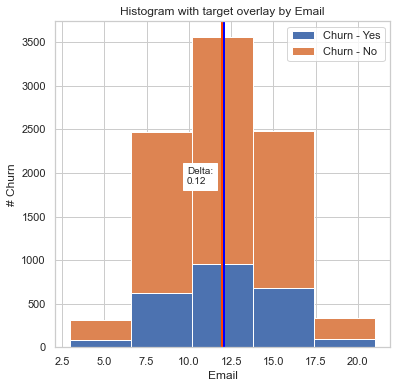

In [42]:
# Churn vs. Email
plot_histogram('Email')

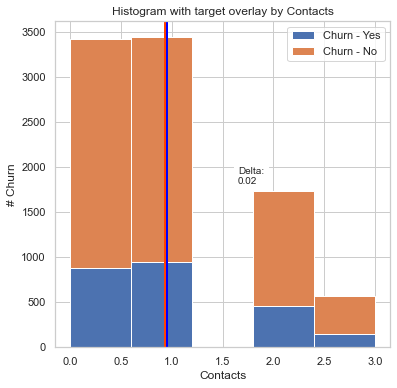

In [43]:
# Churn vs. Contacts
plot_histogram('Contacts')

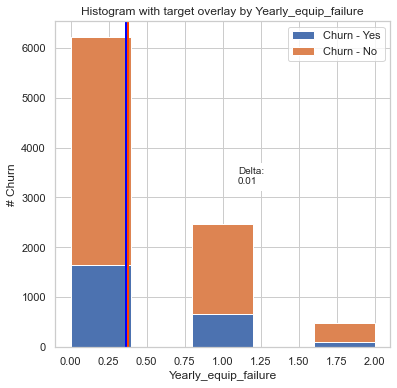

In [44]:
# Churn vs. Yearly_equip_failure
plot_histogram('Yearly_equip_failure')

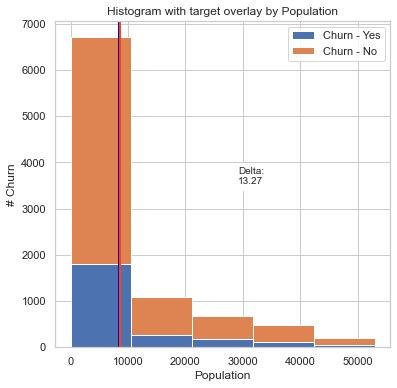

In [45]:
# Churn vs. Population
plot_histogram('Population')

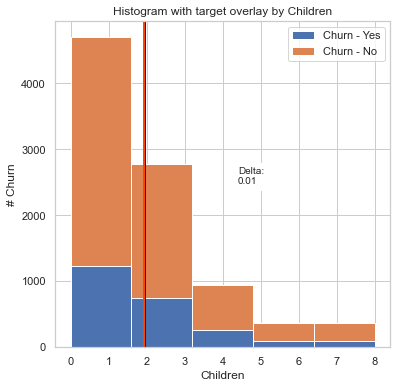

In [46]:
# Churn vs. Children
plot_histogram('Children')

#### Export Data

In [47]:
# Export the cleaned data set to a CSV file. 
clean.to_csv('clean_task2.csv')

#### Initial Model

In [48]:
# Rebalance the data using Synthetic Minority Oversampling Technique (SMOTE).

X = clean.loc[:, clean.columns != 'Churn_Yes']
y = clean.loc[:, clean.columns == 'Churn_Yes']

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Churn_Yes'])

# Verify the data.
print("length of oversampled data is ",len(os_data_X))
print("Number of no churn in oversampled data",len(os_data_y[os_data_y['Churn_Yes']==0]))
print("Number of churn",len(os_data_y[os_data_y['Churn_Yes']==1]))
print("Proportion of no churn data in oversampled data is ",len(os_data_y[os_data_y['Churn_Yes']==0])/len(os_data_X))
print("Proportion of churn data in oversampled data is ",len(os_data_y[os_data_y['Churn_Yes']==1])/len(os_data_X))

length of oversampled data is  9418
Number of no churn in oversampled data 4709
Number of churn 4709
Proportion of no churn data in oversampled data is  0.5
Proportion of churn data in oversampled data is  0.5


In [49]:
# Recursive Feature Elimination (RFE) is used to rank the features for reduction. 

data_final_vars=clean.columns.values.tolist()
y=[target]
X=[i for i in data_final_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select = 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
features =[]
print('The following features are selected:')
for i in range(os_data_X.shape[1]):
    if rfe.support_[i] == True:
        features.append(os_data_X.columns[i])
        print('Column: %d, Rank: %.3f, Feature: %s' % 
          (i, rfe.ranking_[i],
           os_data_X.columns[i]))

/Users/jillrivera/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jillrivera/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

The following features are selected:
Column: 7, Rank: 1.000, Feature: Yearly_equip_failure
Column: 8, Rank: 1.000, Feature: Tenure
Column: 11, Rank: 1.000, Feature: Area_Suburban
Column: 12, Rank: 1.000, Feature: Area_Urban
Column: 13, Rank: 1.000, Feature: Marital_Not_Married
Column: 15, Rank: 1.000, Feature: Gender_Nonbinary
Column: 16, Rank: 1.000, Feature: Techie_Yes
Column: 17, Rank: 1.000, Feature: Contract_One year
Column: 18, Rank: 1.000, Feature: Contract_Two Year
Column: 19, Rank: 1.000, Feature: Port_modem_Yes
Column: 20, Rank: 1.000, Feature: Tablet_Yes
Column: 21, Rank: 1.000, Feature: InternetService_Fiber Optic
Column: 22, Rank: 1.000, Feature: InternetService_None
Column: 23, Rank: 1.000, Feature: Phone_Yes
Column: 24, Rank: 1.000, Feature: Multiple_Yes
Column: 25, Rank: 1.000, Feature: OnlineSecurity_Yes
Column: 26, Rank: 1.000, Feature: OnlineBackup_Yes
Column: 27, Rank: 1.000, Feature: DeviceProtection_Yes
Column: 28, Rank: 1.000, Feature: TechSupport_Yes
Column: 32,

/Users/jillrivera/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jillrivera/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

In [51]:
# Select the highest ranked features from the RFE. 
X=os_data_X[features] # From RFE above
Xc = sm.add_constant(X) # Reset
y=os_data_y[target]
logit_model=sm.Logit(y,Xc)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
                               Results: Logit
Model:                   Logit                 Pseudo R-squared:      inf   
Dependent Variable:      Churn_Yes             AIC:                   inf   
Date:                    2022-06-02 11:27      BIC:                   inf   
No. Observations:        9418                  Log-Likelihood:        -inf  
Df Model:                20                    LL-Null:               0.0000
Df Residuals:            9397                  LLR p-value:           1.0000
Converged:               1.0000                Scale:                 1.0000
No. Iterations:          7.0000                                             
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
const     

/Users/jillrivera/Library/Python/3.8/lib/python/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/jillrivera/Library/Python/3.8/lib/python/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/jillrivera/Library/Python/3.8/lib/python/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/jillrivera/Library/Python/3.8/lib/python/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/jillrivera/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse

/Users/jillrivera/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


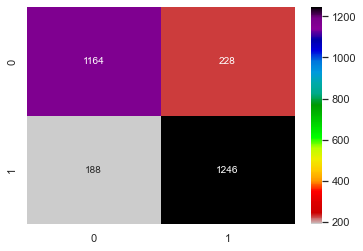

In [52]:
# Confusion matrix for initial model.

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
predicted = lgr.predict(X_test)
expected = y_test
confusion = pd.DataFrame(confusion_matrix(y_true=expected, y_pred=predicted),
                    index=range(2),columns=range(2))
axes = sns.heatmap(confusion, annot=True,cmap='nipy_spectral_r', fmt='g')

In [53]:
# Calculate the number and percentage of predictions.

correct = sum(np.diagonal(confusion)) # on diag
total = confusion.values.sum()
incorrect = total - correct # off diag
print('Correct predictions on diagonal: {} ({:.0%})'.format( correct, correct / total ))
print('Incorrect predictions off diagonal: {} ({:.0%})'.format( incorrect, incorrect / total )) 

Correct predictions on diagonal: 2410 (85%)
Incorrect predictions off diagonal: 416 (15%)


In [54]:
# Find predictor pairs with high correlation.

def redundant_pairs(clean):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = clean.columns
    for i in range(0, clean.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def top_abs_correlations(clean, n=5):
    corr = clean.corr().abs().unstack()
    labels_to_drop = redundant_pairs(clean)
    corr = corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return corr[0:n]
top_abs_correlations(X, 20)

Area_Suburban                Area_Urban                     0.355
InternetService_Fiber Optic  InternetService_None           0.322
Contract_One year            Contract_Two Year              0.190
Tenure                       Contract_Two Year              0.122
                             OnlineBackup_Yes               0.114
                             OnlineSecurity_Yes             0.112
                             Port_modem_Yes                 0.109
                             Tablet_Yes                     0.098
Yearly_equip_failure         Tenure                         0.098
Tenure                       Contract_One year              0.097
                             InternetService_Fiber Optic    0.093
Contract_Two Year            OnlineSecurity_Yes             0.093
Tenure                       Area_Urban                     0.090
                             TechSupport_Yes                0.090
                             Area_Suburban                  0.086
Area_Subur

#### Reduced Model

In [55]:
# Remove features with high p-values or multicollinearity. 
features.remove('Marital_Not_Married')
features.remove('DeviceProtection_Yes')
features.remove('Techie_Yes')

# Remove features with high multicollinearity.
features.remove('Area_Urban') 
features.remove('InternetService_None') 

# Reset and rerun the model.
X=os_data_X[features]
y=os_data_y[target]
Xc = sm.add_constant(X)
logit_model=sm.Logit(y,Xc)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
                               Results: Logit
Model:                   Logit                 Pseudo R-squared:      inf   
Dependent Variable:      Churn_Yes             AIC:                   inf   
Date:                    2022-06-02 13:00      BIC:                   inf   
No. Observations:        9418                  Log-Likelihood:        -inf  
Df Model:                15                    LL-Null:               0.0000
Df Residuals:            9402                  LLR p-value:           1.0000
Converged:               1.0000                Scale:                 1.0000
No. Iterations:          7.0000                                             
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
const     

/Users/jillrivera/Library/Python/3.8/lib/python/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/jillrivera/Library/Python/3.8/lib/python/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/jillrivera/Library/Python/3.8/lib/python/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/jillrivera/Library/Python/3.8/lib/python/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/jillrivera/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse

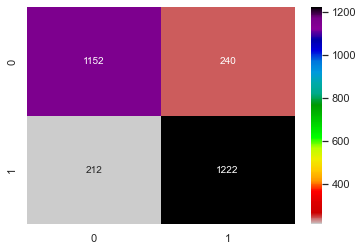

In [56]:
# Reduced model confusion matrix.
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
predicted = lgr.predict(X_test)
expected = y_test
confusion = pd.DataFrame(confusion_matrix(y_true=expected, y_pred=predicted),
                    index=range(2),columns=range(2))
axes = sns.heatmap(confusion, annot=True,cmap='nipy_spectral_r', fmt='g')

In [58]:
# Calculate the number and percentage of predictions.

correct = sum(np.diagonal(confusion)) # on diag
total = confusion.values.sum()
incorrect = total - correct # off diag
print('Correct predictions on diagonal: {} ({:.0%})'.format( correct, correct / total ))
print('Incorrect predictions off diagonal: {} ({:.0%})'.format( incorrect, incorrect / total )) 

Correct predictions on diagonal: 2374 (84%)
Incorrect predictions off diagonal: 452 (16%)


In [59]:
# Classification Report
print(classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1392
           1       0.84      0.85      0.84      1434

    accuracy                           0.84      2826
   macro avg       0.84      0.84      0.84      2826
weighted avg       0.84      0.84      0.84      2826



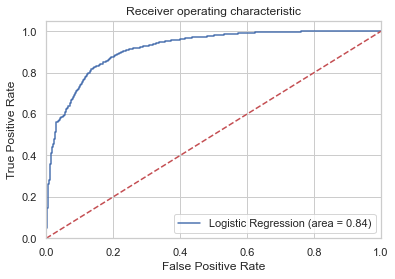

In [60]:
# Receiver Operating Characteristic (ROC) curve plot.
logit_roc_auc = roc_auc_score(y_test, lgr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lgr.predict_proba(X_test)
[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' %logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [61]:
# Reduced model regression line equation.
print('Logit: {:.2f}'.format(logit_roc_auc))
equation = result.summary2().tables[1]
print('Estimate [{}] as L = '.format(result.summary2().tables[0][1][1]))
for i in equation.itertuples():
    print('   {:+.3f} x ( {} ) '.format(i[1],i[0]))

Logit: 0.84
Estimate [Churn_Yes] as L = 
   +4.023 x ( const ) 
   -0.212 x ( Yearly_equip_failure ) 
   -0.069 x ( Tenure ) 
   -0.548 x ( Area_Suburban ) 
   -0.831 x ( Gender_Nonbinary ) 
   -2.485 x ( Contract_One year ) 
   -2.703 x ( Contract_Two Year ) 
   -0.314 x ( Port_modem_Yes ) 
   -0.491 x ( Tablet_Yes ) 
   -1.032 x ( InternetService_Fiber Optic ) 
   -0.779 x ( Phone_Yes ) 
   +0.708 x ( Multiple_Yes ) 
   -0.519 x ( OnlineSecurity_Yes ) 
   +0.121 x ( OnlineBackup_Yes ) 
   -0.393 x ( TechSupport_Yes ) 
   -0.194 x ( PaymentMethod_Check ) 


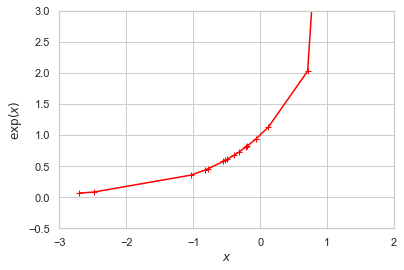

In [62]:
# Log coefficient using exp(x) plot.
import matplotlib.pyplot as plt
X_coeff = []
for i in equation.itertuples():
    X_coeff.append(i[1])
X_coeff.sort()
x = X_coeff
y = np.exp(x)
plt.figure()
plt.plot(X_coeff, y, color="red", marker="+")
plt.xlim([-3.0, 2.0])
plt.ylim([-0.5, 3.0])
plt.xlabel('$x$')
plt.ylabel('$\exp(x)$')
plt.show()